In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from subprocess import check_output
print(check_output(['ls',]).decode('utf8'))

In [0]:
median_house_hold_in_come=pd.read_csv('MedianHouseholdIncome2015.csv',encoding='windows-1252')
percentage_people_below_poverty_level=pd.read_csv('PercentagePeopleBelowPovertyLevel.csv',encoding='windows-1252')
percent_over_25_completed_highSchool=pd.read_csv('PercentOver25CompletedHighSchool.csv',encoding='windows-1252')
share_race_city=pd.read_csv('ShareRaceByCity.csv',encoding='windows-1252')
kill=pd.read_csv('PoliceKillingsUS.csv',encoding='windows-1252')

In [0]:
percentage_people_below_poverty_level.head()

In [0]:
percentage_people_below_poverty_level.info()

In [0]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

In [0]:
percentage_people_below_poverty_level['Geographic Area'].unique()

In [0]:
#BAR PLOT
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace=True)
percentage_people_below_poverty_level.poverty_rate=percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list=list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio=[]
for i in area_list:
    x=percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate=sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data=pd.DataFrame({'area_list':area_list,'area_poverty_ratio':area_poverty_ratio})
new_index=(data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data=data.reindex(new_index)
#visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'],y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation=360)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [0]:
# Most common 15 Name or Surname of killed people
kill.head()

In [0]:
kill.name.value_counts()

In [0]:
seperate=kill.name[kill.name!='TK TK'].str.split()
a,b=zip(*seperate)
name_list=a+b
name_count=Counter(name_list)
most__common_names=name_count.most_common(15)
x,y=zip(*most__common_names)
x,y=list(x),list(y)
#
plt.figure(figsize=(15,10))
palette=sns.cubehelix_palette(len(x))
ax=sns.barplot(x=x,y=y,palette=palette)
plt.xlabel('Name or Surname of killed People')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

In [0]:
percent_over_25_completed_highSchool.head()

In [0]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

In [0]:
percent_over_25_completed_highSchool.info()

In [0]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace=True)
percent_over_25_completed_highSchool.percent_completed_hs=percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list=list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool=[]
for i in area_list:
    x=percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate=sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
#sorting
data=pd.DataFrame({'area_list':area_list,'area_highschool_ratio':area_highschool})
new_index=(data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2=data.reindex(new_index)
#
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'],y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation=360)
plt.xlabel('States')
plt.ylabel('high School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

In [0]:
share_race_city.head()

In [0]:
share_race_city.info()

In [0]:
# Percentage of state's population according to races that are black,white,native american, asian and hispanic
share_race_city.replace(['-'],0.0,inplace=True)
share_race_city.replace(['(X)'],0.0,inplace=True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']]=share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list=list(share_race_city['Geographic area'].unique())
share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]
for i in area_list:
    x=share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))
#
figure,ax=plt.subplots(figsize=(9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha=0.5,label='White')
sns.barplot(x=share_black,y=area_list,color='blue',alpha=0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha=0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha=0.6,label='Hispanic')
ax.legend(loc='lower right',frameon=True)#legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races',ylabel='States',title="Percentage of State's Population According to Races")

In [0]:
#POINT PLOT
#high school graduation rate vs Poverty rate of each state
## Normalization
sorted_data['area_poverty_ratio']= sorted_data['area_poverty_ratio']/max(sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio']=sorted_data2['area_highschool_ratio']/max(sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)
#
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='black',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='r',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='r',fontsize=18)
plt.text(40,0.55,'poverty ratio',color='black',fontsize=18)
plt.xlabel('States',fontsize=15,color='black')
plt.title('High School Gradiate vs Poverty Rate',fontsize=15,color='black')
plt.ylabel('Values',fontsize=15,color='black')
plt.grid()

In [0]:
data.head()

In [0]:
# JOINT PLOT
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
''' kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }'''
sns.jointplot(data.area_poverty_ratio,data.area_highschool_ratio,kind='kde',size=7)
plt.show()

In [0]:
sns.jointplot("area_poverty_ratio","area_highschool_ratio",kind='resid',data=data,size=7)

In [0]:
#PIE CHART
kill.race.head(15)

In [0]:
kill.race.value_counts()

In [0]:
# Race rates according in kill data 
kill.race.dropna(inplace=True)
labels=kill.race.value_counts().index
color=['grey','blue','red','yellow','green','black']
explode=[0,0,0,0,0,0]
sizes=kill.race.value_counts().values
#visualization

plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,colors=color,labels=labels,autopct='%1.1f%%')
plt.title('Killed Peiple According to Races',color='black',fontsize=15)

In [0]:
#LM PLOT
data.head()
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset

In [0]:
sns.lmplot(x='area_poverty_ratio',y='area_highschool_ratio',data=data)
plt.show()

In [0]:
#KDE PLOT
data.head()
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# cubehelix plot

In [0]:
sns.kdeplot(data.area_poverty_ratio,data.area_highschool_ratio,shade=False,cut=3)

In [0]:
#violin Plot
data.head()
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
palette=sns.cubehelix_palette(2,rot=-5,dark=3)
sns.violinplot(data=data,palette=palette,inner='points')

In [0]:
#HEATMAP
data.corr()

In [0]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor='grey',fmt='0.1f',ax=ax)

In [0]:
#BOX PLOT
kill.head()
# gender cinsiyet
# age: yas
# Plot the orbital period with horizontal boxes

In [0]:
kill.manner_of_death.unique()

In [0]:
sns.boxplot(x='gender',y='age',hue='manner_of_death',data=kill,palette='PRGn')

In [0]:
#Swarm Plot
kill.head()
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas

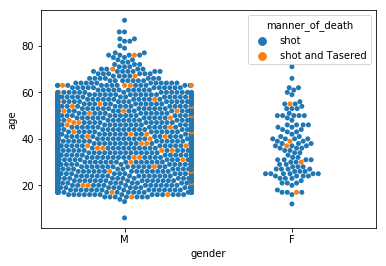

In [36]:
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

In [37]:
#PAIR PLOT
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


In [38]:
sns.pairplot(data)

In [0]:
#COUNT PLOT
kill.gender.value_counts()
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

In [0]:
#kill weapon
armed=kill.armed.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:5].index,y=armed[:5].values)
plt.ylabel('Number of  weapon')
plt.xlabel('weapon types')
plt.title('kill weapon',color='black',fontsize=15)

In [0]:
# age of killed people
above25=['above25' if i>=25 else 'below25' for i in kill.age]
df=pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of killed people')
plt.title('age of killed people',color='black',fontsize=15)

In [0]:
# Race of killed people
sns.countplot(data=kill,x='race')
plt.title('Race of killed people',color='black',fontsize=15)

In [0]:
# Most dangerous cities
city=kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:5].index,y=city[:5].values)
plt.xticks(rotation=360)
plt.title('Most Dangerous Cities',color='black',fontsize=15)

In [0]:
# most dangerous states
state=kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:5].index,y=state[:5].values)
plt.title('Most Dangerous States',color='black',fontsize=15)

In [0]:
# Having mental ilness or not for killed people
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental ilness')
plt.ylabel('Number of mental illness')
plt.title('Having mental illness or not',color='black',fontsize=15)

In [0]:
# Threat types
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat Types',color='black',fontsize=15)


In [0]:
# Flee types
sns.countplot(kill.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)

In [0]:
# Having body cameras or not for police
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)

In [0]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)